In [11]:
library(ggplot2)

In [1]:
rm(list = ls())

In [3]:
setwd("~/R/regression analysis/data/")

In [7]:
wind <- read.csv("wind(1).csv")

In [8]:
head(wind)

,i,x,y
,<int>,<dbl>,<dbl>
1,1,5.0,1.582
2,2,6.0,1.822
3,3,3.4,1.057
4,4,2.7,0.500
5,5,10.0,2.236
6,6,9.7,2.386


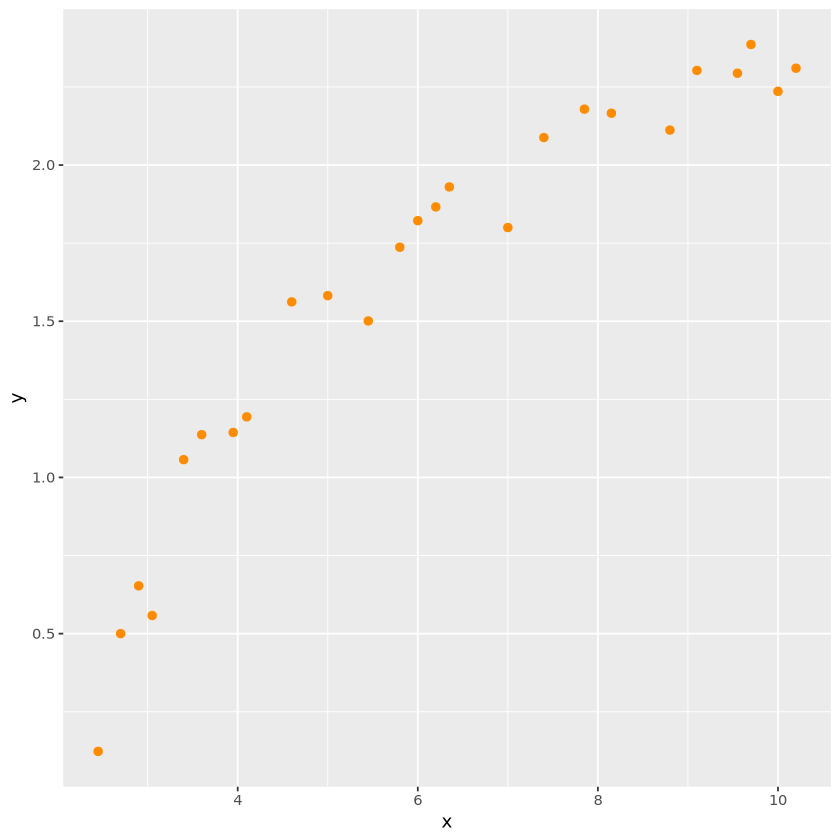

In [14]:
ggplot(wind, aes(x, y)) +
    geom_point(cex = 2, col = "darkorange")

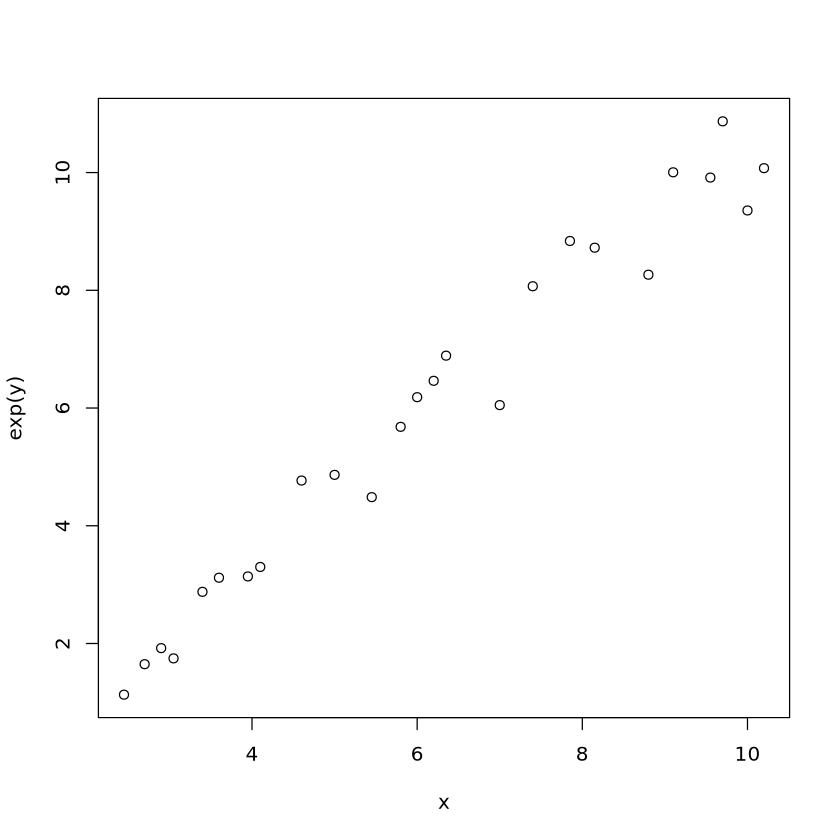

In [17]:
plot(exp(y)~x, wind)

> exponential을 취하니까 이분산성 비슷한 게 생김(비권장)

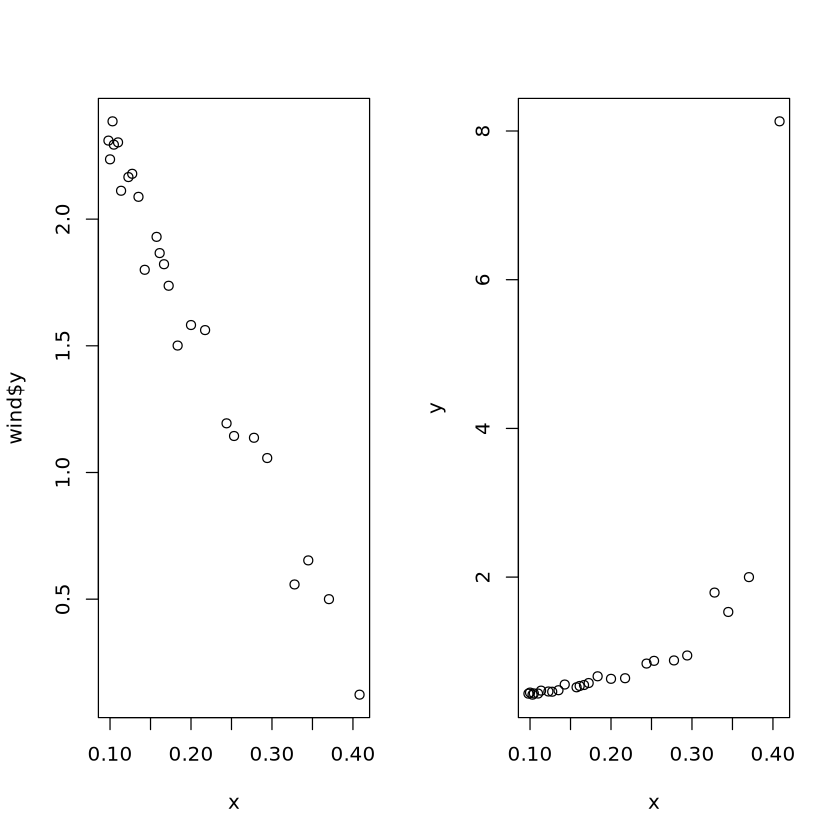

In [29]:
x <- 1/wind$x
y <- 1/wind$y
par(mfcol = c(1,2))
plot(x, wind$y)
plot(x, y)

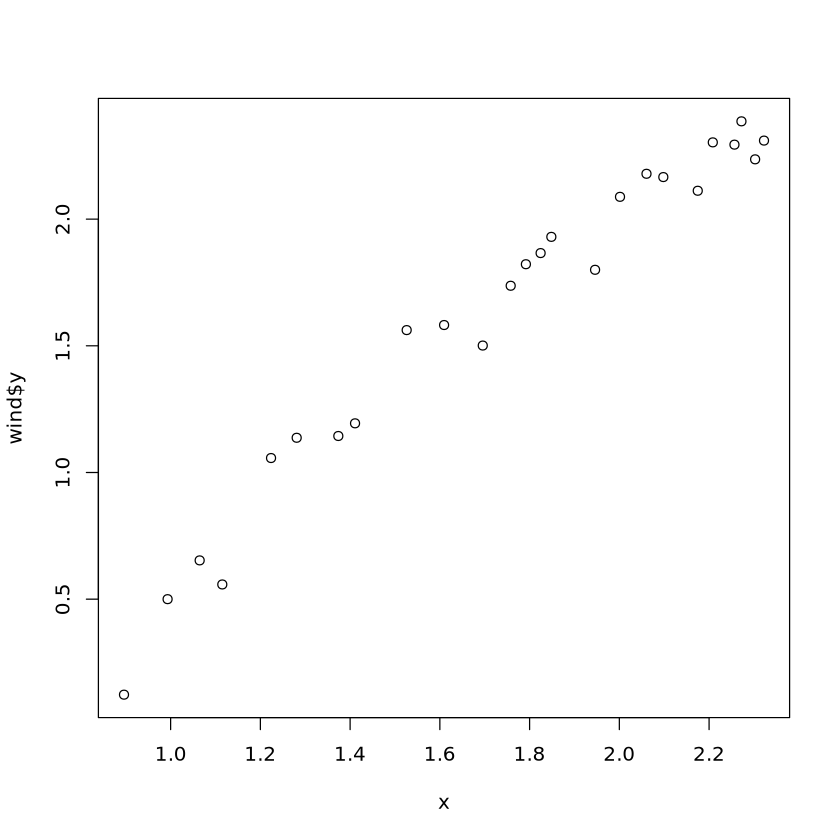

In [30]:
x <- log(wind$x)
plot(x, wind$y)

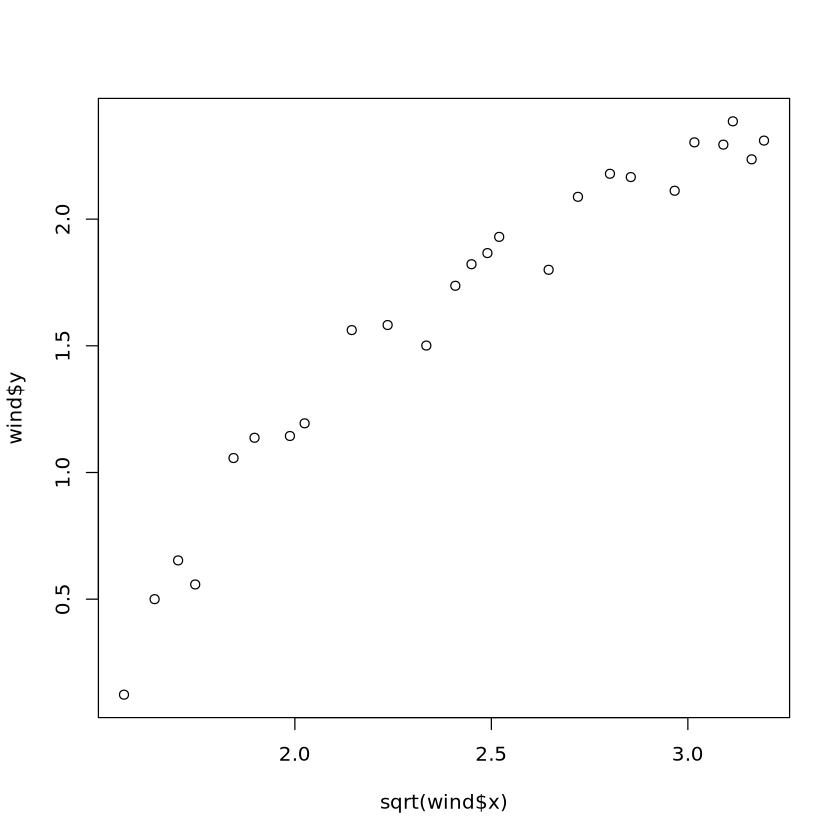

In [32]:
plot(sqrt(wind$x), wind$y)

> x를 제곱근, 로그변환 해보고, y를 지수, 제곱변환 해봤지만, 가장 좋았던 건 x를 역수변환하는 것이었음. 위처럼 특별한 관계가 있을 경우에는 그것을 캐치하는 것이 무엇보다 중요함.

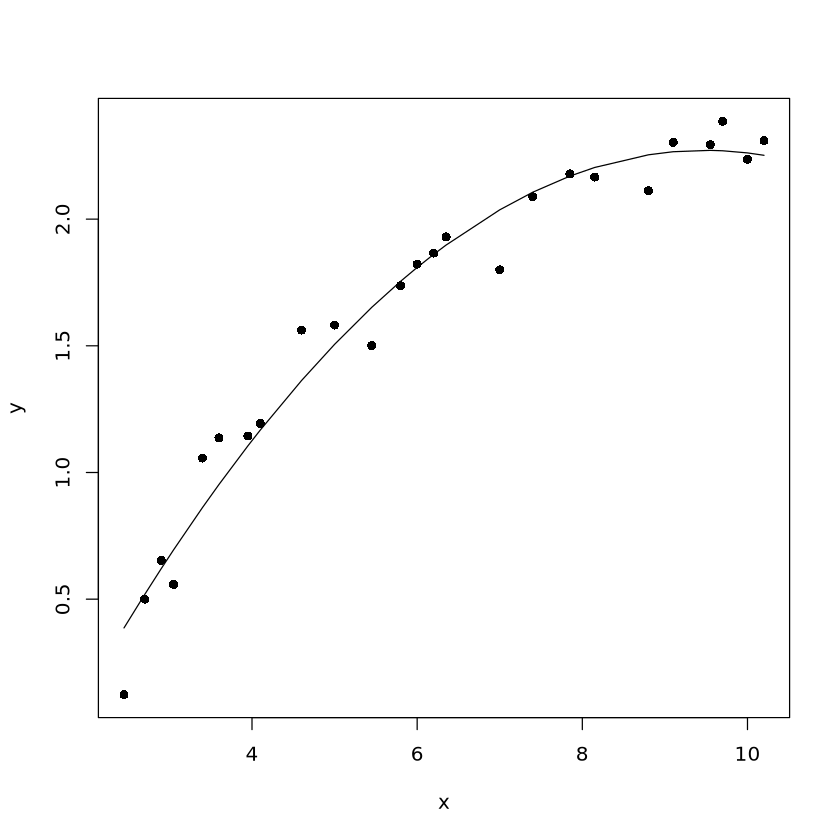

In [43]:
plot(y~x, wind, pch = 16)
lines(sort(wind$x), predict(lm(y~x+I(x^2), wind), data.frame(x = sort(wind$x))))

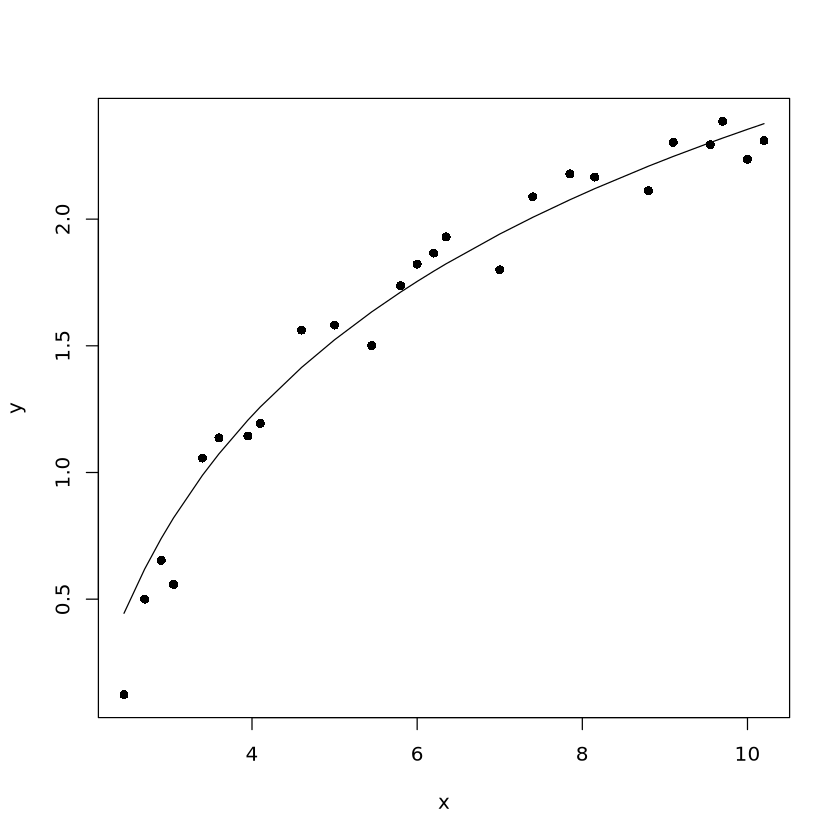

In [47]:
plot(y~x, wind, pch = 16)
lines(sort(wind$x), log(predict(lm(exp(y)~x, wind), data.frame(x = sort(wind$x)))))

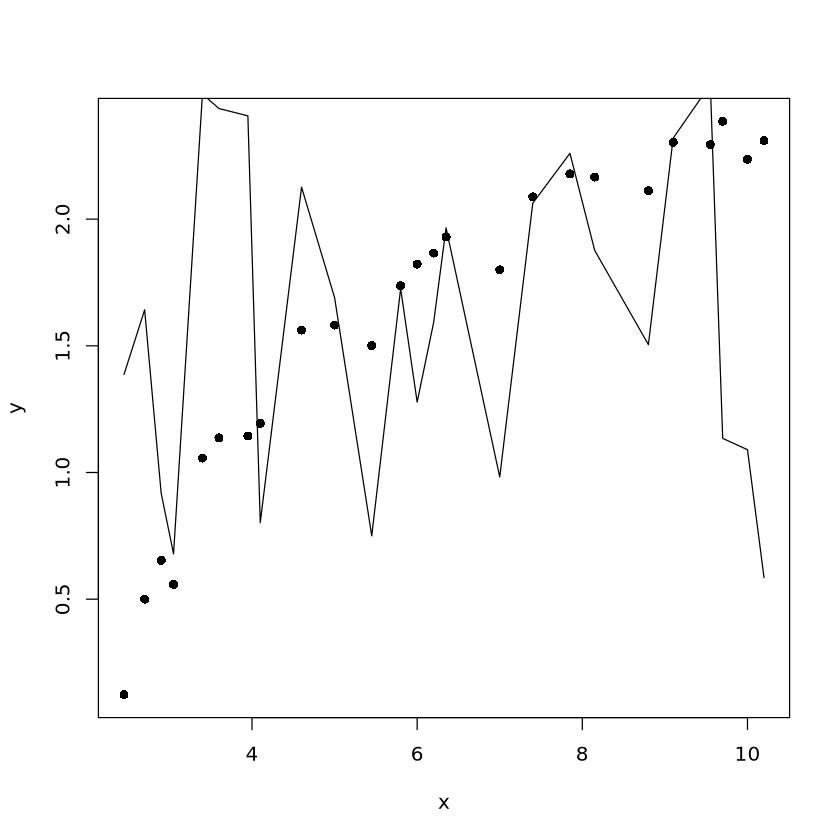

In [52]:
plot(y~x, wind, pch = 16)
lines(sort(wind$x), predict(lm(wind$y~sqrt(wind$x)), data.frame(x = sqrt(sort(wind$x)))))

In [68]:
df <- data.frame(x = sqrt(wind$x), y = wind$y)
sq_model <- lm(y~x, df)

In [69]:
summary(sq_model)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4625 -0.1135  0.0398  0.1443  0.2842 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.28466    0.17955  -7.155 2.76e-07 ***
x            1.19477    0.07251  16.478 3.14e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1862 on 23 degrees of freedom
Multiple R-squared:  0.9219,	Adjusted R-squared:  0.9185 
F-statistic: 271.5 on 1 and 23 DF,  p-value: 3.145e-14


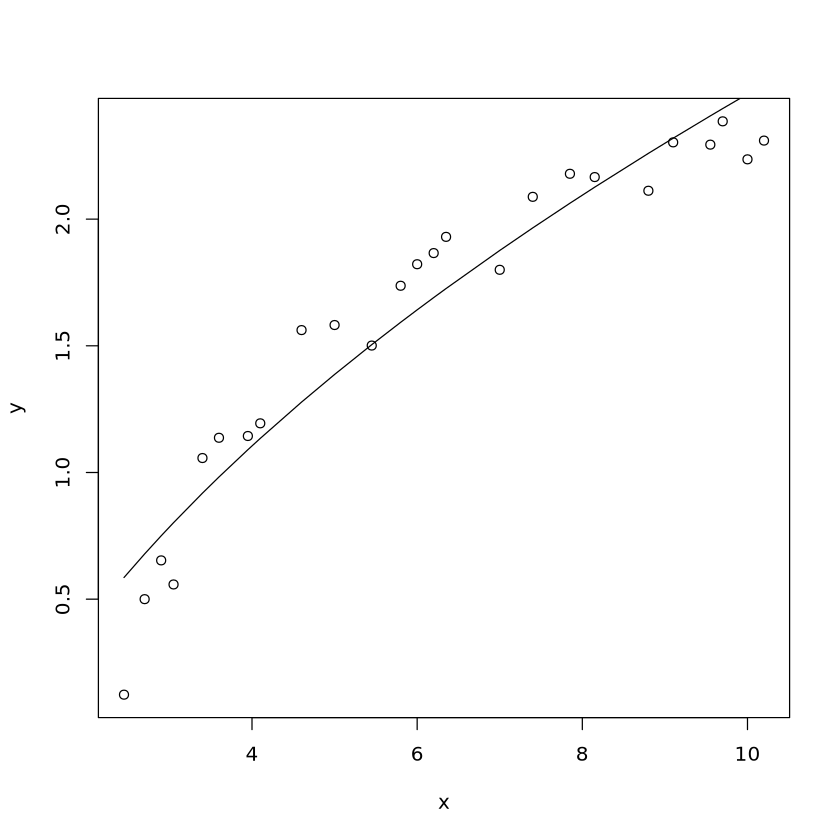

In [75]:
plot(y~x, wind)
lines(sort(wind$x), predict(sq_model, data.frame(x = sort(df$x))))

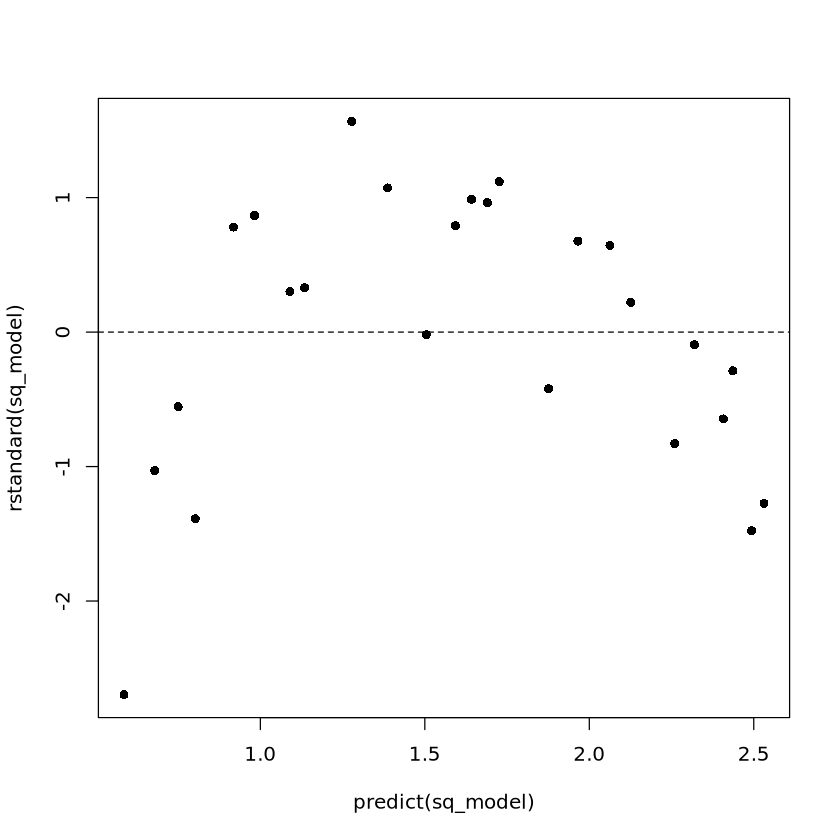

In [82]:
plot(predict(sq_model), rstandard(sq_model), pch = 16)
abline(h = 0, lty = 2)

선형성 불만족, 정규성 -3으로 보면 만족, 등분산성 만족, 독립성 애매함.

In [83]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [84]:
bptest(sq_model)


	studentized Breusch-Pagan test

data:  sq_model
BP = 2.781, df = 1, p-value = 0.09539


$H_0 : homoskedasticity ~ vs. ~ H_1 : not ~ H_0$

> 귀무가설 기각 불가, 따라서 등분산

In [86]:
shapiro.test(residuals(sq_model))


	Shapiro-Wilk normality test

data:  residuals(sq_model)
W = 0.95186, p-value = 0.2761


$H_0 : normal ~ vs. ~ H_1 : not ~ H_0$

> 귀무가설 기각 불가, 따라서 정규성 만족

In [87]:
dwtest(sq_model, alternative = "two.sided")


	Durbin-Watson test

data:  sq_model
DW = 1.1701, p-value = 0.02573
alternative hypothesis: true autocorrelation is not 0


$H_0 : \rho = 0 ~ vs. ~ H_1 : \rho \neq 0$

> 귀무가설 기각, 잔차는 양의 1차 자기상관을 가지고 있음. (그래보이긴 함.)

In [89]:
initech <- read.csv("initech(1).csv")
head(initech)

,years,salary
,<int>,<int>
1,1,41504
2,1,32619
3,1,44322
4,2,40038
5,2,46147
6,2,38447


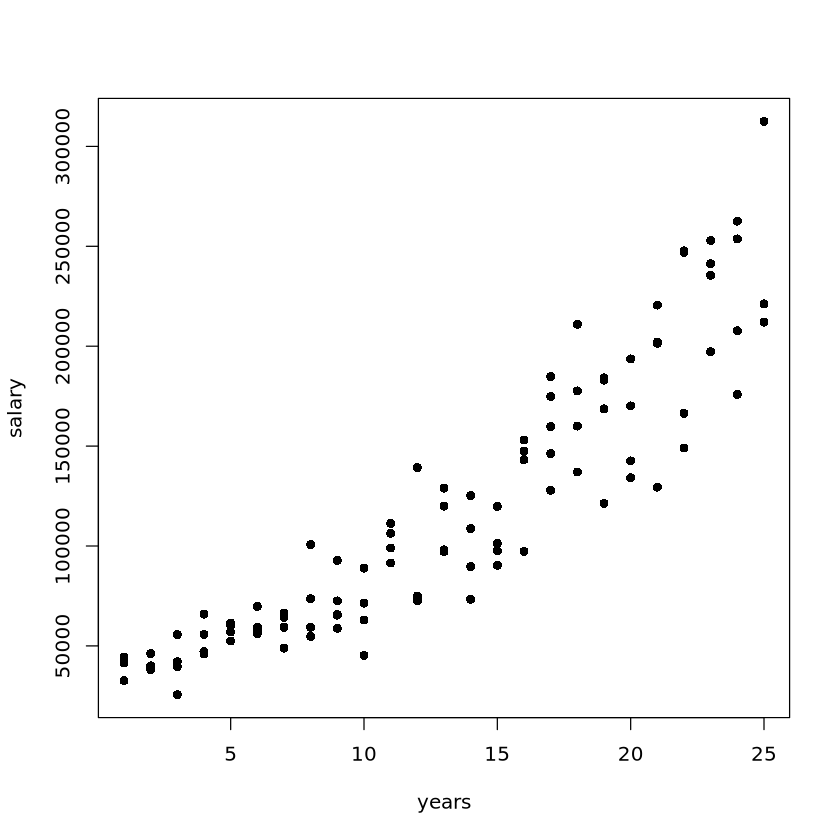

In [93]:
plot(salary~years, initech, pch = 16)

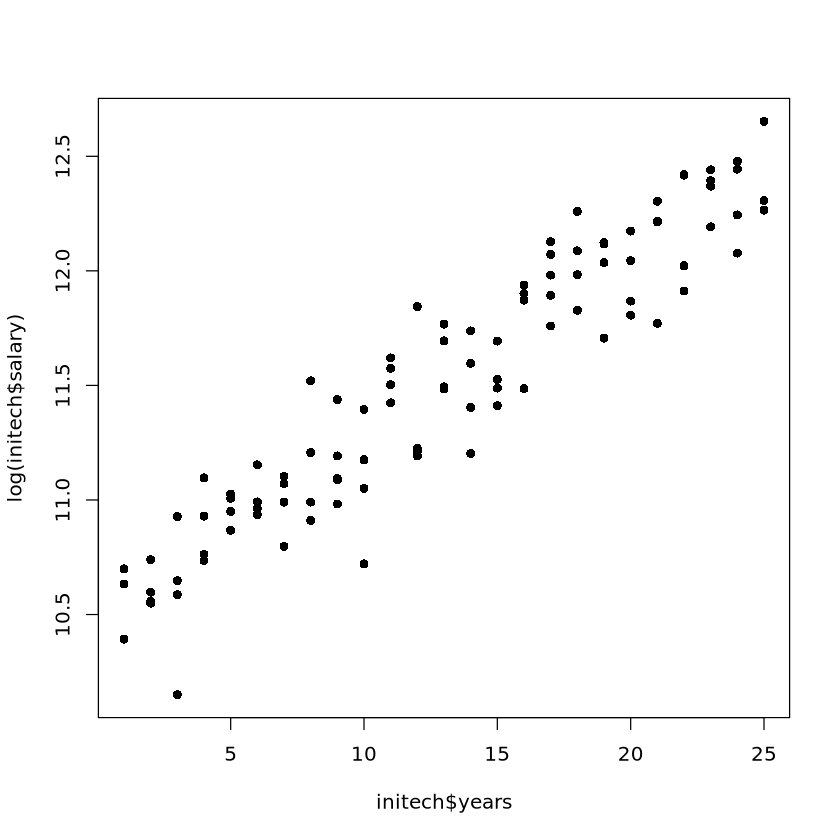

In [94]:
plot(log(initech$salary)~initech$years, pch = 16)

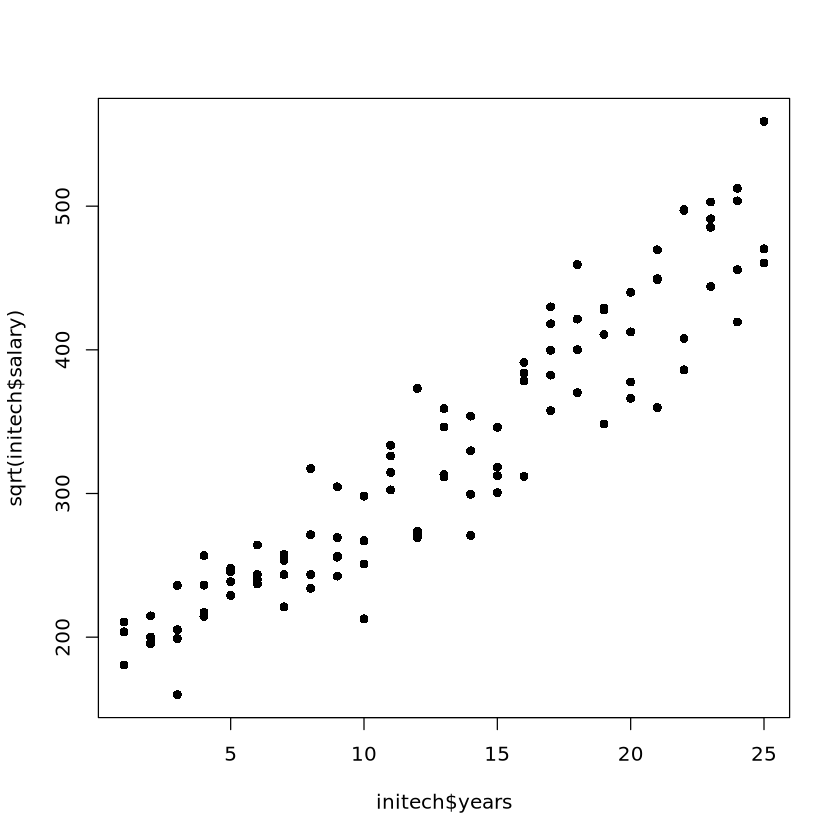

In [95]:
plot(sqrt(initech$salary)~initech$years, pch = 16)

> 제곱근 변환만 해도 훌륭하긴 할듯. 물론 로그 변환이 완벽할듯.

In [97]:
df2 <- data.frame(x = initech$years, y = log(initech$salary))
log_model <- lm(y~x, df2)

In [98]:
summary(log_model)


Call:
lm(formula = y ~ x, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57022 -0.13560  0.03048  0.14157  0.41366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.48381    0.04108  255.18   <2e-16 ***
x            0.07888    0.00278   28.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1955 on 98 degrees of freedom
Multiple R-squared:  0.8915,	Adjusted R-squared:  0.8904 
F-statistic: 805.2 on 1 and 98 DF,  p-value: < 2.2e-16


In [99]:
model = lm(salary~., initech)
summary(model)


Call:
lm(formula = salary ~ ., data = initech)

Residuals:
   Min     1Q Median     3Q    Max 
-57225 -18104    241  15589  91332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5302       5750   0.922    0.359    
years           8637        389  22.200   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27360 on 98 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.8324 
F-statistic: 492.8 on 1 and 98 DF,  p-value: < 2.2e-16


In [100]:
options(repr.plot.width = 16, repr.plot.height = 9)

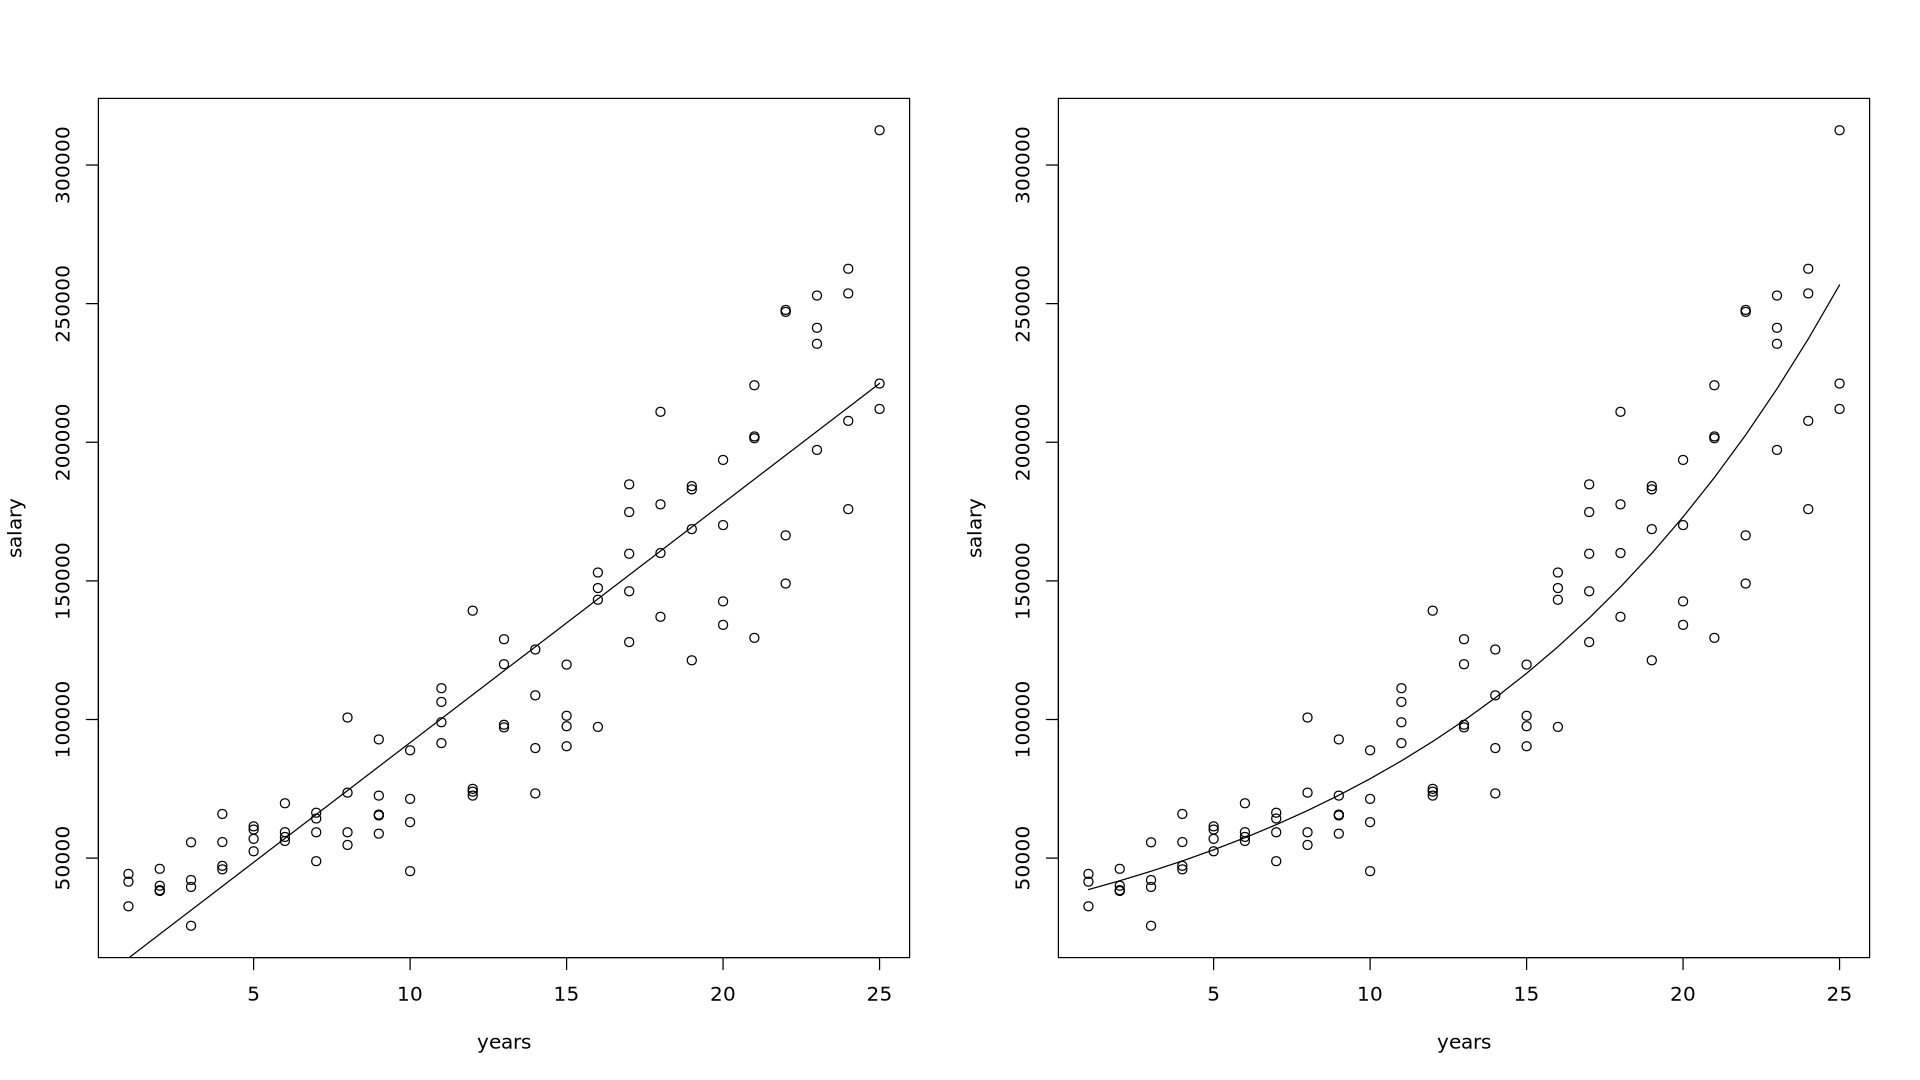

In [105]:
par(mfcol = c(1,2))
plot(salary~years, initech)
lines(sort(initech$years), predict(model, data.frame(years = sort(initech$years))))
plot(salary~years, initech)
lines(sort(initech$years), exp(predict(log_model, data.frame(x = sort(initech$years)))))

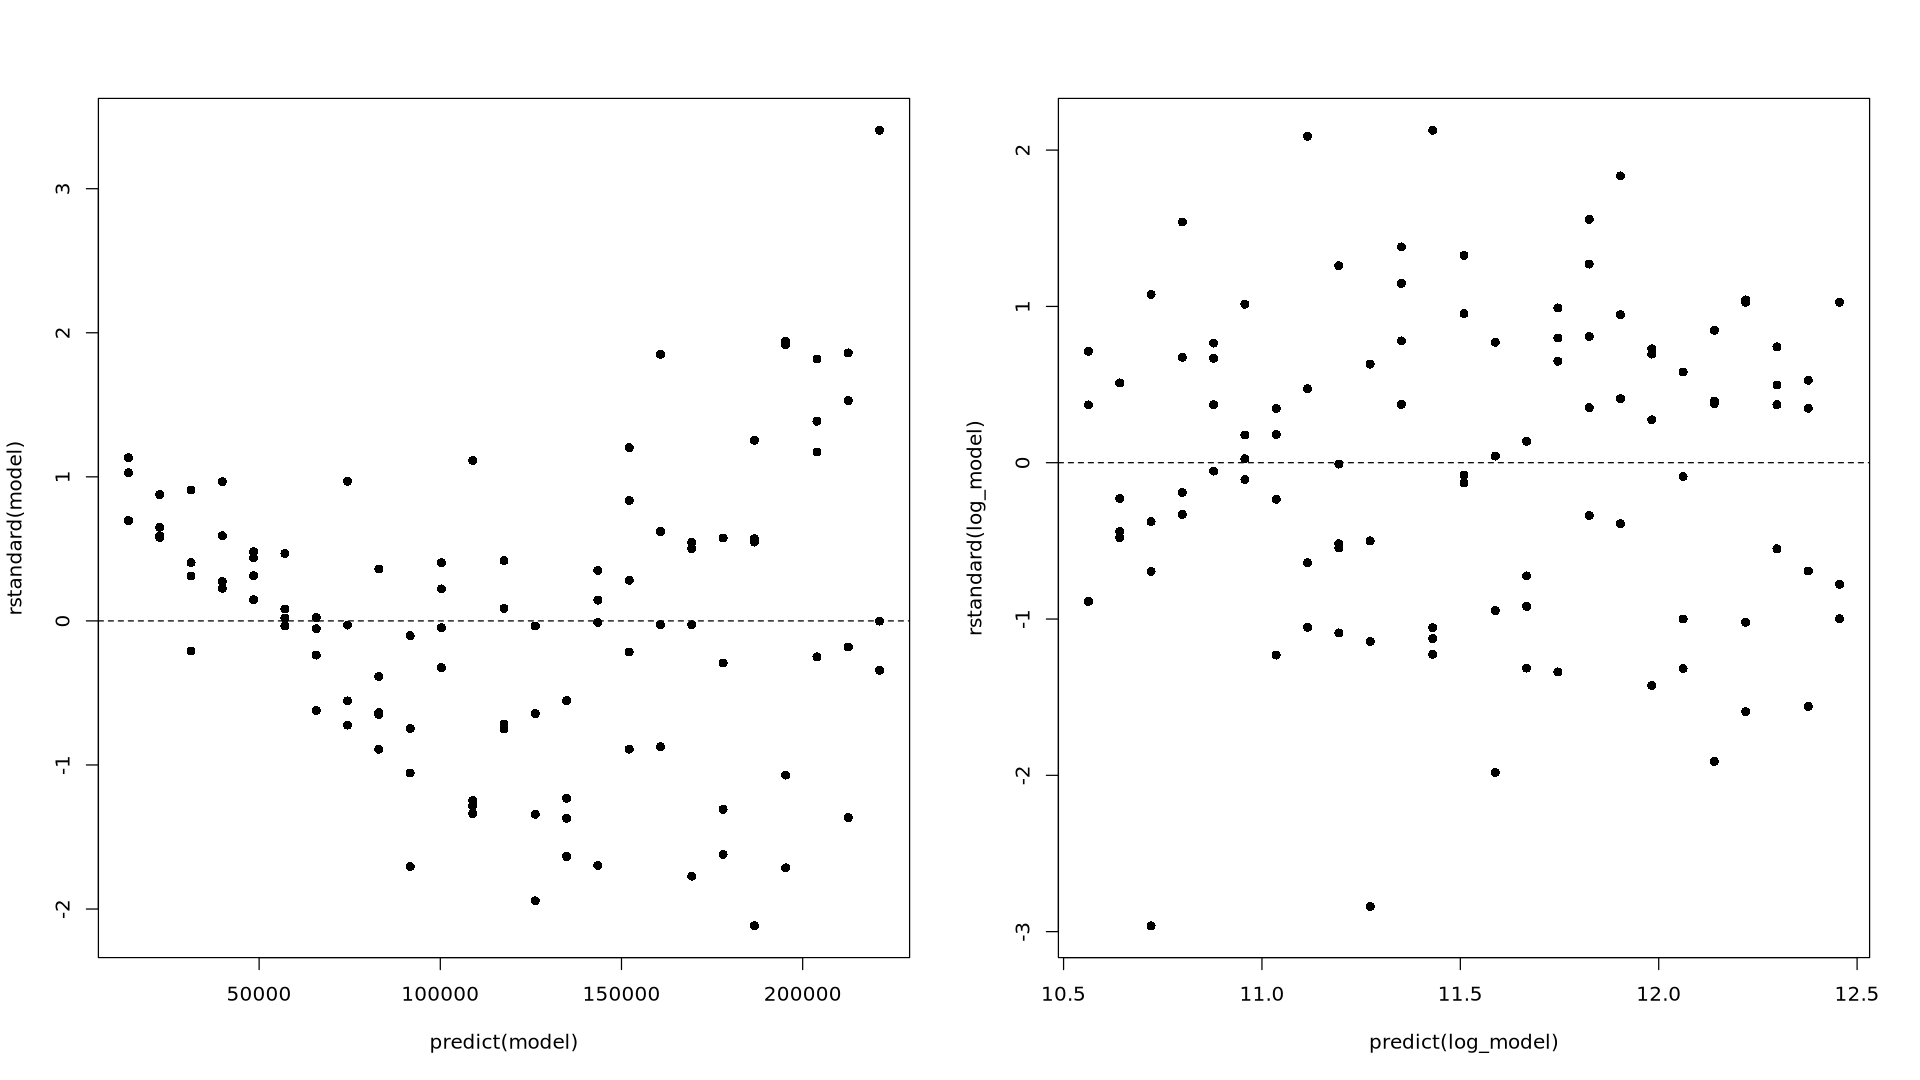

In [109]:
par(mfcol = c(1,2))
plot(predict(model), rstandard(model), pch = 16)
abline(h = 0, lty = 2)
plot(predict(log_model), rstandard(log_model), pch = 16)
abline(h = 0, lty = 2)

* 1번 잔차그림

> 위아래로 대칭 : 선형성 만족
>
> $\hat{y}$값이 커질수록 잔차의 범위가 넓어짐 : 등분산성 불만족
>
> 잔차의 절댓값이 3보다 큰 것이 존재 : 정규성 불만족
>
> 독립성 : 만족하는 것으로 보임.

In [112]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 16.927, df = 1, p-value = 3.885e-05


> 이분산성 존재.

In [114]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.98258, p-value = 0.2101


> 정규성 만족한다고 나옴.

In [115]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 1.3313, p-value = 0.0002496
alternative hypothesis: true autocorrelation is greater than 0


> 자기상관이 있다네요? 그것도 생각보다 심하게?

In [116]:
dwtest(log_model)


	Durbin-Watson test

data:  log_model
DW = 1.8181, p-value = 0.1534
alternative hypothesis: true autocorrelation is greater than 0


> 로그 모델은 자기상관 없넹

In [117]:
bptest(log_model)


	studentized Breusch-Pagan test

data:  log_model
BP = 6.2095e-06, df = 1, p-value = 0.998


> 이분산성도 당연히 없음.

In [119]:
set.seed(2002)
n <- 50
x <- round(runif(n, 1, 15), 2)
y <- 20+5*x +rnorm(n, 0, 2*x)  ## 분산이 x^2에 비례...

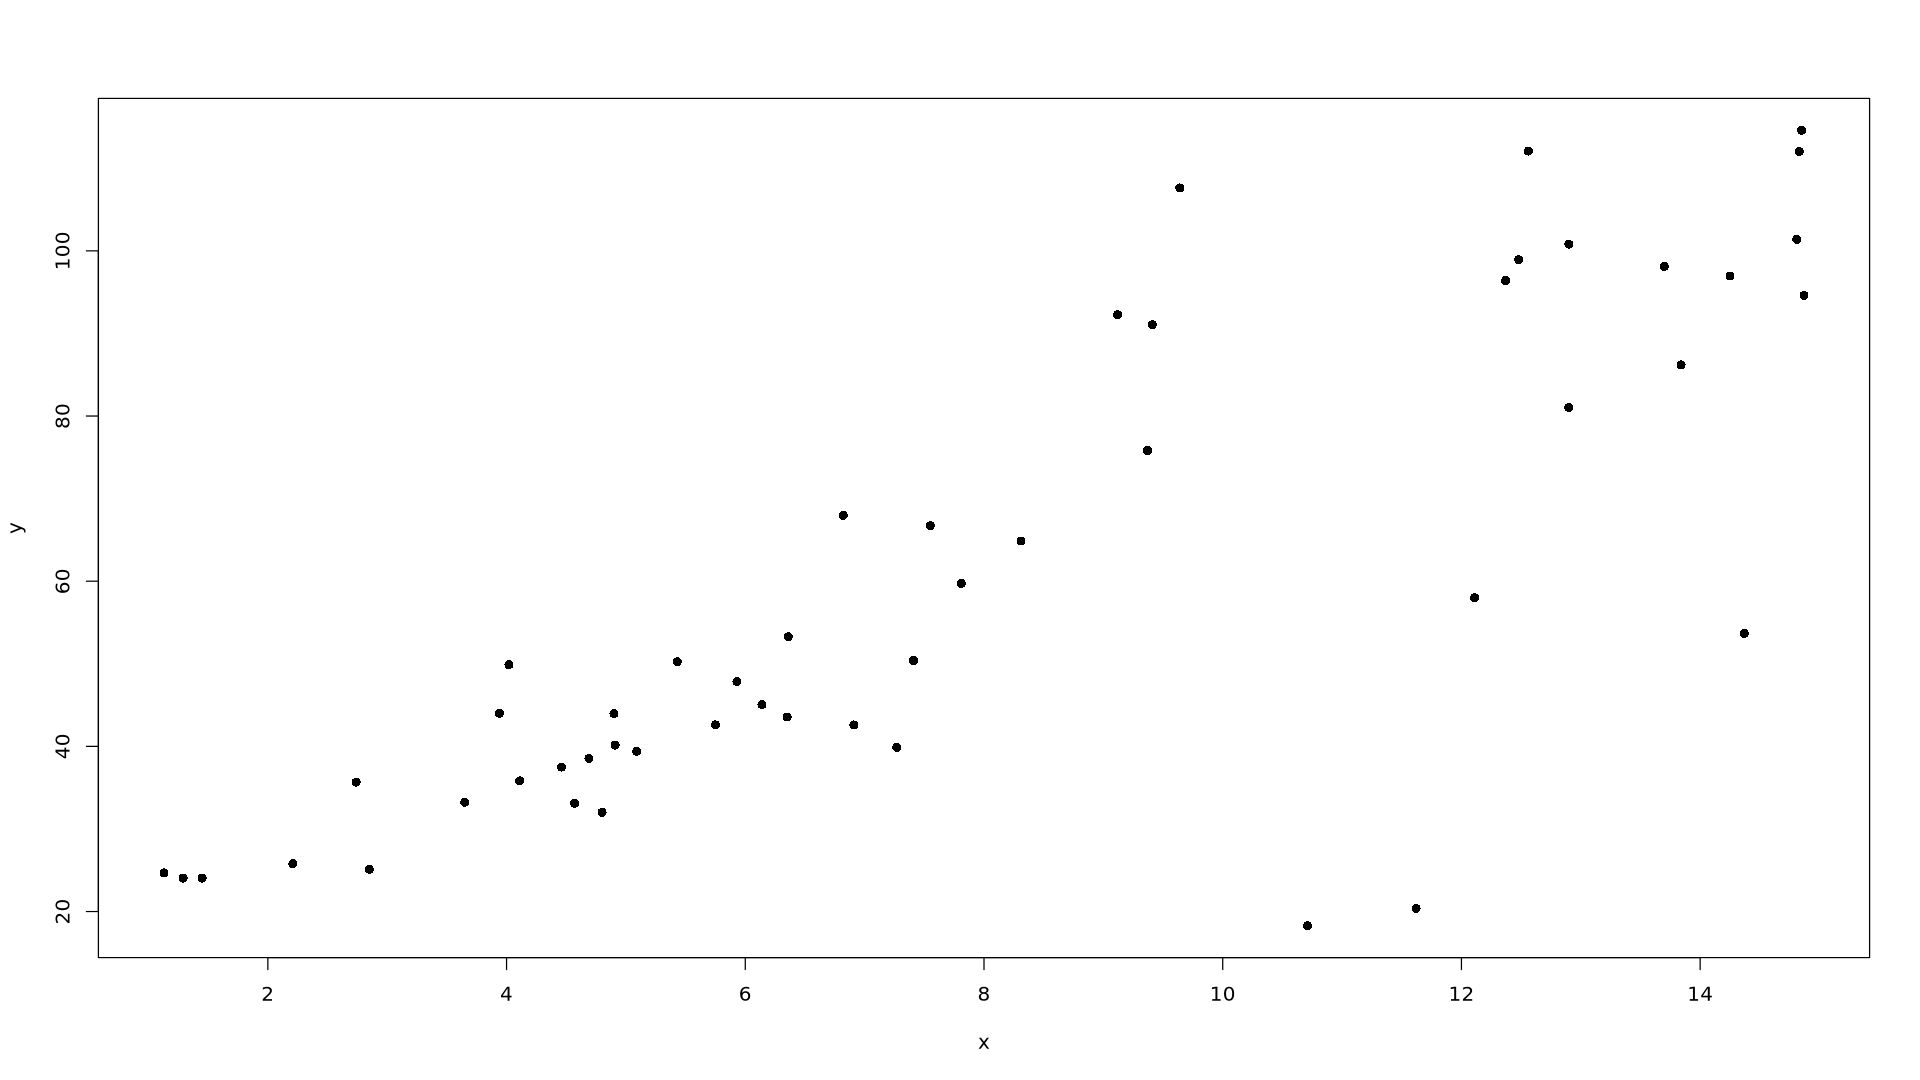

In [121]:
plot(y~x, pch = 16)

In [122]:
m <- lm(y~x)
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.027  -5.182   0.936   8.418  39.112 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15.479      5.405   2.864  0.00619 ** 
x              5.501      0.599   9.183 3.82e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.74 on 48 degrees of freedom
Multiple R-squared:  0.6373,	Adjusted R-squared:  0.6297 
F-statistic: 84.33 on 1 and 48 DF,  p-value: 3.819e-12


In [124]:
m2 <- lm(y~x, weights = 1/x^2)
summary(m2)


Call:
lm(formula = y ~ x, weights = 1/x^2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-5.1240 -0.8126  0.0533  1.2360  4.1564 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.1199     1.5061   11.37 3.24e-15 ***
x             5.2319     0.3884   13.47  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.835 on 48 degrees of freedom
Multiple R-squared:  0.7908,	Adjusted R-squared:  0.7865 
F-statistic: 181.5 on 1 and 48 DF,  p-value: < 2.2e-16


In [125]:
m2$coef

(Intercept)           x 
  17.119854    5.231896

In [161]:
X <- model.matrix(m)
beta <- matrix(m2$coef)
W <- diag(x^2)

solve(t(X)%*%solve(W)%*%X)%*%t(X)%*%solve(W)%*%y  ## GLS 방식

(Intercept),17.119854
x,5.231896


In [163]:
t(y - mean(y))%*%solve(W)%*%(y - mean(y))  ## 이거 아님???

3236.463


In [146]:
sqrt(sum((1/x^2)*((y - predict(m2))^2))/48)

[1] 1.834656

In [133]:
SST <- sum((1/x^2)*(y - mean(y))^2)
SSE <- sum((1/x^2)*(y - predict(m2))^2)
SSR <- sum((1/x^2)*(mean(y) - predict(m2))^2)

In [134]:
SSR/SST

[1] 0.9500794

In [135]:
sum((mean(y)-predict(m2))^2)/sum((y - mean(y))^2)

[1] 0.5767327

In [164]:
dt <- read.csv("corr(1).csv")

In [166]:
dt |> head()

,y,x
,<dbl>,<dbl>
1,349.7,133.6
2,353.5,135.4
3,359.2,137.6
4,366.4,140.0
5,376.5,143.8
6,385.7,147.1


In [168]:
auto <- lm(y~x, dt)

In [170]:
summary(auto)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.959  -8.874   2.035   9.035  16.623 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   89.234     26.721   3.339  0.00365 ** 
x              2.024      0.166  12.196 3.89e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.98 on 18 degrees of freedom
Multiple R-squared:  0.892,	Adjusted R-squared:  0.886 
F-statistic: 148.7 on 1 and 18 DF,  p-value: 3.888e-10


In [171]:
dwtest(auto)


	Durbin-Watson test

data:  auto
DW = 0.31237, p-value = 1.238e-08
alternative hypothesis: true autocorrelation is greater than 0


In [175]:
nrow(dt)

[1] 20

In [176]:
e_1 <- resid(auto)[-20]
e_2 <- resid(auto)[-1]

In [182]:
rho_hat <- sum((e_1 - mean(e_1))*(e_2 - mean(e_2)))/sum((e_1 - mean(e_1))^2); rho_hat

[1] 0.8955662

In [183]:
lm(e_2~e_1)  ## 잔차의 1차 자기상관회귀모형


Call:
lm(formula = e_2 ~ e_1)

Coefficients:
(Intercept)          e_1  
    -0.5218       0.8956  


In [185]:
x <- dt$x
y <- dt$y

y_t <- y[-1] - rho_hat*y[-20]  ## i = 2, 3, ..., 20
x_t <- x[-1] - rho_hat*x[-20]

In [191]:
predict(lm(y_t~x_t))

1        2        3        4        5        6        7        8 
46.59295 46.84490 47.02904 47.73633 47.69213 47.15421 47.61593 47.43233 
       9       10       11       12       13       14       15       16 
48.07440 48.68893 48.23862 48.57816 49.24002 48.62726 48.22942 49.87749 
      17       18       19 
49.80576 49.05997 48.90133


Call:
lm(formula = y_t ~ x_t)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.9633  -1.2140   0.8272   3.5764   8.1526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  39.8432    13.0508   3.053  0.00719 **
x_t           0.4285     0.6666   0.643  0.52894   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.332 on 17 degrees of freedom
Multiple R-squared:  0.02373,	Adjusted R-squared:  -0.0337 
F-statistic: 0.4132 on 1 and 17 DF,  p-value: 0.5289


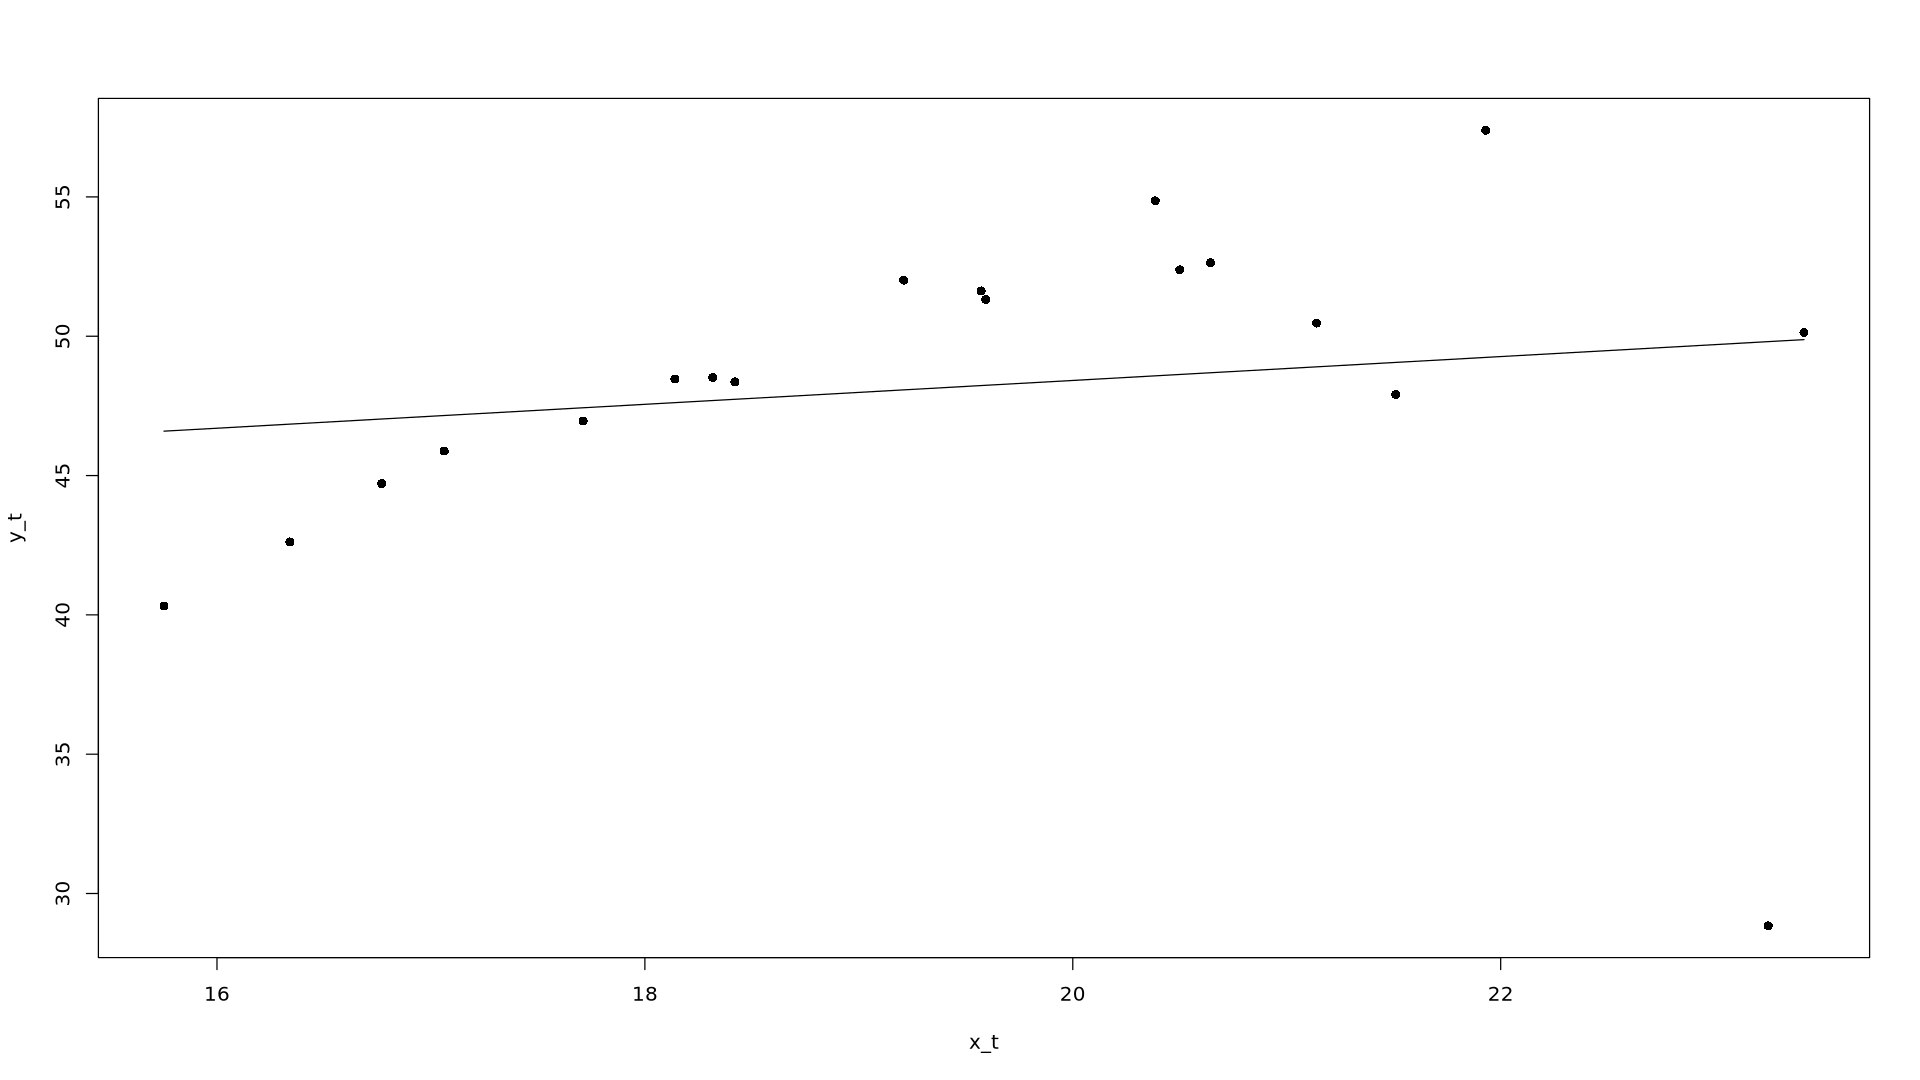

In [196]:
plot(y_t~x_t, pch = 16)
lines(x_t, predict(lm(y_t~x_t)))
summary(lm(y_t~x_t))

In [211]:
X <- model.matrix(auto)[-1,]
V <- diag(19)
V <- rho_hat^abs(col(V) - row(V))
y <- dt$y[-1]

beta <- solve(t(X)%*%solve(V)%*%X)%*%t(X)%*%solve(V)%*%y

In [212]:
SSE <- t(y - X%*%beta)%*%solve(V)%*%(y - X%*%beta)

In [214]:
SST <- t(y - mean(y))%*%solve(V)%*%(y - mean(y))

In [216]:
1- SSE/SST

0.5381503


In [218]:
SSR <- SST - SSE
F <- (SSR/1)/(SSE/17)

In [229]:
pf(F, 1, 17, lower.tail = FALSE)

0.000350909
